# 20152410 배형준 머신러닝 과제5

In [1]:
# library import

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

# 1. Plot the training data

In [12]:
# load dataset

train = pd.read_csv('./과제5/data.txt', header=None)
train.columns = ['x', 'y', 'l']

label_0 = train.loc[train['l'] == 0, :]
label_1 = train.loc[train['l'] == 1, :]

X = train[['x', 'y']]
Y = train['l']

In [13]:
train.head()

,x,y,l
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


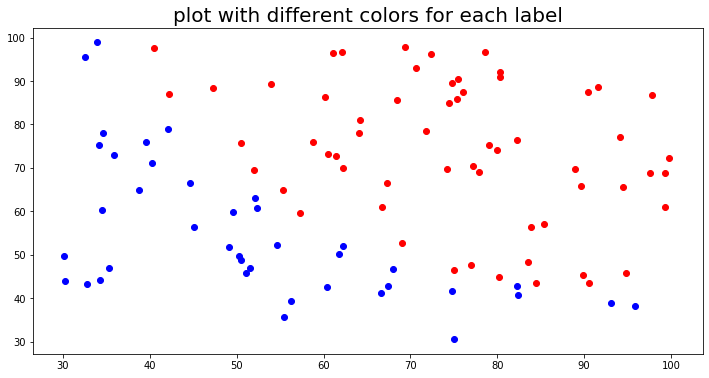

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(label_0.x, label_0.y, 'bo')
plt.scatter(label_1.x, label_1.y, c='r')
plt.title('plot with different colors for each label', fontsize=20)
plt.show()

파란 점과 빨간 점을 적당히 구분할 수 있는 선이 존재함을 시각적으로 확인할 수 있다. 다만 직선보다는 완만한 곡선이 두 그룹을 더 잘 구별할 수 있을 것 같다.

# 2. Plot the estimated parameters

In [139]:
def sigmoid(X, theta):
    z = 1 / (1 + np.exp(- X.dot(theta)))
    return z

In [143]:
def logistic_regression(X, Y):
    # 데이터 타입 정리
    m = len(Y)
    X = np.hstack((np.ones((m, 1)), X))
    Y = np.array(Y).reshape(-1, 1)
    
    # learning parameters
    learning_rate = 10**(-5)
    error_bound = 10**(-6)
    critical_value = 0.5
    
    # setting for learning
    initial_theta = np.random.randn(3, 1)
    initial_sigmoid = sigmoid(X, initial_theta)
    initial_loss = np.sum(- Y * np.log(initial_sigmoid) - (1 - Y) * np.log(1 - initial_sigmoid)) / m

    temp_theta = initial_theta
    temp_sigmoid = initial_sigmoid
    record_theta = initial_theta.T
    record_loss = [float(initial_loss)]

    # predict
    initial_predict = np.where(initial_sigmoid >= critical_value, 1, 0)
    record_accuracy = [np.mean(initial_predict)]
    
    ## model learning
    while True:
        # calculate gradient
        gradient_theta = ((temp_sigmoid - Y).T.dot(X)).T / m
        
        # renew the parameters, calculate loss to evaluate the parameters
        temp_theta = temp_theta - learning_rate * gradient_theta
        temp_sigmoid = sigmoid(X, temp_theta)
        temp_loss = np.sum(- Y * np.log(temp_sigmoid) - (1 - Y) * np.log(1 - temp_sigmoid)) / m
        
        # store results
        record_theta = np.vstack((record_theta, temp_theta.T))
        record_loss.append(float(temp_loss))
        temp_predict = np.where(temp_sigmoid >= critical_value, 1, 0)
        record_accuracy.append(np.mean(temp_predict))
        
        # stopping rule
        if len(record_loss) > 100000 and record_loss[-2] - record_loss[-1] < error_bound:
            break
    
    result_theta = record_theta[-1, :]
    fitted_value = temp_predict
    
    return result_theta, fitted_value, record_theta, record_loss, record_accuracy

In [144]:
result_theta, fitted_value, record_theta, record_loss, record_accuracy = logistic_regression(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


In [146]:
print(record_loss[1], record_loss[-2], record_loss[-1])

nan 0.5714564268170911 0.5714560396100237


In [148]:
print(record_accuracy[-1])

0.97


In [150]:
print(record_loss[-2] - record_loss[-1])

3.872070674093564e-07


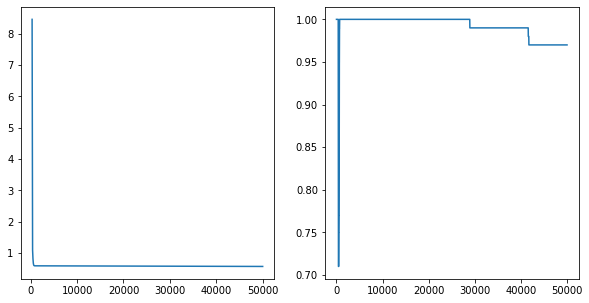

In [149]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(record_loss)
plt.subplot(122)
plt.plot(record_accuracy)
plt.show()